# GWAS catalog updates

In [1]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import sys

In [2]:
from genetics import Genetics

api = Genetics()

In [3]:
otg_info = pd.read_pickle('data/info.pkl')
otg_info

,traitReported,traitEfos,pmid,pubDate,pubJournal,pubTitle,pubAuthor,hasSumsStats,ancestryInitial,ancestryReplication,nInitial,nReplication,nCases,nTotal,traitCategory,numAssocLoci,bestLocus2GenesOrClosest_id,bestLocus2GenesOrClosest_symbol
studyId,,,,,,,,,,,,,,,,,,
GCST000001,Age-related macular degeneration,[EFO_0001365],PMID:15761122,2005-03-10,Science,Complement factor H polymorphism in age-relate...,Klein RJ,False,[European=146],[],146,NaN,96,146,Nervous system,1,"(ENSG00000000971,)","(CFH,)"
GCST000002,Parkinson's disease,[EFO_0002508],PMID:16252231,2005-09-09,Am J Hum Genet,High-resolution whole-genome association study...,Maraganore DM,False,"[Asian unspecified=1, European=744, Other=141]","[Other=122, Asian unspecified=1, European=541]",886,664,NaN,1550,Nervous system,0,NaN,NaN
GCST000003,Obesity,[EFO_0001073],PMID:16614226,2006-04-14,Science,A common genetic variant is associated with ad...,Herbert A,False,[NR=694],"[European=10527, African American or Afro-Cari...",694,11622,NaN,12316,Disease,0,NaN,NaN
GCST000004,QT interval,[EFO_0004682],PMID:16648850,2006-04-30,Nat Genet,A common genetic variant in the NOS1 regulator...,Arking DE,False,[European=200],[European=4851],200,4851,NaN,5051,Cardiovascular measurement,1,"(ENSG00000198929,)","(NOS1AP,)"
GCST000005,Parkinson's disease,[EFO_0002508],PMID:17052657,2006-09-28,Lancet Neurol,Genome-wide genotyping in Parkinson's disease ...,Fung HC,False,[European=537],[],537,NaN,267,537,Nervous system,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAIGE_988,Toxic effect of noxious substances eaten as food,[EFO_0008546],None,2018-10-24,None,None,UKB SAIGE,True,[European=408481],[],408481,0,114,408481,Disease,0,NaN,NaN
SAIGE_989,"Toxic effect of other substances, chiefly nonm...",[EFO_0008546],None,2018-10-24,None,None,UKB SAIGE,True,[European=408425],[],408425,0,58,408425,Disease,0,NaN,NaN
SAIGE_990,Effects radiation nos,[EFO_0009658],None,2018-10-24,None,None,UKB SAIGE,True,[European=406425],[],406425,0,3130,406425,Disease,0,NaN,NaN


In [4]:
otg_info.loc['GCST006585']

traitReported                                            Blood protein levels [A1CF]
traitEfos                                                              [EFO_0007937]
pmid                                                                   PMID:30072576
pubDate                                                                   2018-08-02
pubJournal                                                                   Science
pubTitle                           Co-regulatory networks of human serum proteins...
pubAuthor                                                                 Emilsson V
hasSumsStats                                                                   False
ancestryInitial                                                      [European=3200]
ancestryReplication                                                               []
nInitial                                                                        3200
nReplication                                                     

## Download GWAS catalog from EBI and exclude studies that are already processed by OTG

In [5]:
ebi = pd.read_table('https://www.ebi.ac.uk/gwas/api/search/downloads/alternative')
ebi = ebi[~ebi['STUDY ACCESSION'].isin(otg_info.index.values)].sort_values('DATE ADDED TO CATALOG').set_index('STUDY ACCESSION')
ebi = ebi[~ebi['PUBMEDID'].isin(['29875488', '28915241', '28369058', '27532455'])] ## remove blood protein levels
ebi = ebi[ebi['P-VALUE'].astype(float) <= 5e-8]
ebi['MAPPED_TRAIT'] = [f'{x[0].upper()}{x[1:]}' if not pd.isna(x) else x for x in ebi['MAPPED_TRAIT']]

ebi

/home/gokcen/.miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (9,11,12,13,23,27,29,31) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV,MAPPED_TRAIT,MAPPED_TRAIT_URI,GENOTYPING TECHNOLOGY
STUDY ACCESSION,,,,,,,,,,,,,,,,,,,,,
GCST000117,2008-06-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Blue vs. green eyes,"2,986 individuals","3,932 individuals",...,2E-53,52.698970,NaN,6.7400,[4.61-9.83],Illumina [317511],N,Eye color,http://www.ebi.ac.uk/efo/EFO_0003949,Genome-wide genotyping array
GCST000117,2008-06-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Blue vs. green eyes,"2,986 individuals","3,932 individuals",...,3E-12,11.522879,NaN,1.5200,[1.28-1.81],Illumina [317511],N,Eye color,http://www.ebi.ac.uk/efo/EFO_0003949,Genome-wide genotyping array
GCST000119,2008-06-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Freckles,"2,986 individuals","3,932 individuals",...,4E-18,17.397940,NaN,1.4000,[1.26-1.57],Illumina [317511],N,Freckles,http://www.ebi.ac.uk/efo/EFO_0003963,Genome-wide genotyping array
GCST000119,2008-06-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Freckles,"2,986 individuals","3,932 individuals",...,1E-96,96.000000,NaN,4.3700,[3.56-5.37],Illumina [317511],N,Freckles,http://www.ebi.ac.uk/efo/EFO_0003963,Genome-wide genotyping array
GCST000119,2008-06-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Freckles,"2,986 individuals","3,932 individuals",...,2E-11,10.698970,NaN,1.3200,[1.17-1.49],Illumina [317511],N,Freckles,http://www.ebi.ac.uk/efo/EFO_0003963,Genome-wide genotyping array
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCST010726,2020-11-02,32517579,Armstrong NJ,2020-06-10,Stroke,www.ncbi.nlm.nih.gov/pubmed/32517579,Common Genetic Variation Indicates Separate Ca...,Periventricular white matter hyperintensities,"16,832 European ancestry individuals, 736 Afri...","8,428 European and unknown ancestry individuals",...,3E-8,7.522879,NaN,0.0350,[0.023-0.047] unit increase,"Affymetrix, Illumina [NR] (imputed)",N,White matter hyperintensity measurement,http://www.ebi.ac.uk/efo/EFO_0005665,Genome-wide genotyping array
GCST010726,2020-11-02,32517579,Armstrong NJ,2020-06-10,Stroke,www.ncbi.nlm.nih.gov/pubmed/32517579,Common Genetic Variation Indicates Separate Ca...,Periventricular white matter hyperintensities,"16,832 European ancestry individuals, 736 Afri...","8,428 European and unknown ancestry individuals",...,5E-11,10.301030,NaN,0.0374,[0.026-0.049] unit increase,"Affymetrix, Illumina [NR] (imputed)",N,White matter hyperintensity measurement,http://www.ebi.ac.uk/efo/EFO_0005665,Genome-wide genotyping array
GCST010726,2020-11-02,32517579,Armstrong NJ,2020-06-10,Stroke,www.ncbi.nlm.nih.gov/pubmed/32517579,Common Genetic Variation Indicates Separate Ca...,Periventricular white matter hyperintensities,"16,832 European ancestry individuals, 736 Afri...","8,428 European and unknown ancestry individuals",...,4E-8,7.397940,NaN,0.0373,[0.024-0.051] unit increase,"Affymetrix, Illumina [NR] (imputed)",N,White matter hyperintensity measurement,http://www.ebi.ac.uk/efo/EFO_0005665,Genome-wide genotyping array


In [6]:
ebi_studies = pd.read_table('https://www.ebi.ac.uk/gwas/api/search/downloads/studies')
ebi_studies

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,PLATFORM [SNPS PASSING QC],ASSOCIATION COUNT
0,2012-10-19,21102463,Franke A,2010-11-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/21102463,Genome-wide meta-analysis increases to 71 the ...,Crohn's disease,"6,333 European ancestry cases, 15,056 European...","15,694 European ancestry cases, 14,026 Europea...","Affymetrix, Illumina [953241] (imputed)",71
1,2011-01-13,21051598,Pereyra F,2010-11-04,Science,www.ncbi.nlm.nih.gov/pubmed/21051598,The major genetic determinants of HIV-1 contro...,HIV-1 control,"516 European cases, 1,196 European controls, 3...",NaN,Illumina [1384048] (imputed),8
2,2010-09-15,20700443,Meyer TE,2010-08-05,PLoS Genet,www.ncbi.nlm.nih.gov/pubmed/20700443,Genome-wide association studies of serum magne...,Magnesium levels,"15,366 European ancestry individuals","8,463 European ancestry individuals","Affymetrix, Illumina [~ 2500000] (imputed)",9
3,2009-01-12,19060906,Kathiresan S,2008-12-07,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/19060906,Common variants at 30 loci contribute to polyg...,HDL cholesterol,"19,840 European ancestry individuals","Up to 20,623 European ancestry individuals","Affymetrix, Illumina [~ 2600000] (imputed)",14
4,2009-01-14,19060906,Kathiresan S,2008-12-07,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/19060906,Common variants at 30 loci contribute to polyg...,LDL cholesterol,"19,840 European ancestry individuals","Up to 20,623 European ancestry individuals","Affymetrix, Illumina [~ 2600000] (imputed)",11
...,...,...,...,...,...,...,...,...,...,...,...,...
10228,2019-02-08,30595370,Kichaev G,2018-12-27,Am J Hum Genet,www.ncbi.nlm.nih.gov/pubmed/30595370,Leveraging Polygenic Functional Enrichment to ...,Lung function (FVC),"approximately 372,000 European ancestry indivi...",NaN,NR [~ 8900000] (imputed),570
10229,2019-02-08,30595370,Kichaev G,2018-12-27,Am J Hum Genet,www.ncbi.nlm.nih.gov/pubmed/30595370,Leveraging Polygenic Functional Enrichment to ...,Hair color,"approximately 452,000 European ancestry indivi...",NaN,NR [~ 8900000] (imputed),449
10230,2019-02-08,30595370,Kichaev G,2018-12-27,Am J Hum Genet,www.ncbi.nlm.nih.gov/pubmed/30595370,Leveraging Polygenic Functional Enrichment to ...,Morning person,"approximately 410,000 European ancestry indivi...",NaN,NR [~ 8900000] (imputed),168
10231,2019-02-08,30595370,Kichaev G,2018-12-27,Am J Hum Genet,www.ncbi.nlm.nih.gov/pubmed/30595370,Leveraging Polygenic Functional Enrichment to ...,Neuroticism,"approximately 372,000 European ancestry indivi...",NaN,NR [~ 8900000] (imputed),147


In [7]:
ebi = ebi.reset_index().merge(ebi_studies, how='left').set_index('STUDY ACCESSION')

In [8]:
ebi.head(3)

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV,MAPPED_TRAIT,MAPPED_TRAIT_URI,GENOTYPING TECHNOLOGY,ASSOCIATION COUNT
STUDY ACCESSION,,,,,,,,,,,,,,,,,,,,,
GCST000117,2008-06-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Blue vs. green eyes,"2,986 individuals","3,932 individuals",...,52.698970,NaN,6.74,[4.61-9.83],Illumina [317511],N,Eye color,http://www.ebi.ac.uk/efo/EFO_0003949,Genome-wide genotyping array,3
GCST000117,2008-06-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Blue vs. green eyes,"2,986 individuals","3,932 individuals",...,11.522879,NaN,1.52,[1.28-1.81],Illumina [317511],N,Eye color,http://www.ebi.ac.uk/efo/EFO_0003949,Genome-wide genotyping array,3
GCST000119,2008-06-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Freckles,"2,986 individuals","3,932 individuals",...,17.397940,NaN,1.40,[1.26-1.57],Illumina [317511],N,Freckles,http://www.ebi.ac.uk/efo/EFO_0003963,Genome-wide genotyping array,3


In [9]:
ebi.index.nunique()

741

In [10]:
ebi.columns

Index(['DATE ADDED TO CATALOG', 'PUBMEDID', 'FIRST AUTHOR', 'DATE', 'JOURNAL',
       'LINK', 'STUDY', 'DISEASE/TRAIT', 'INITIAL SAMPLE SIZE',
       'REPLICATION SAMPLE SIZE', 'REGION', 'CHR_ID', 'CHR_POS',
       'REPORTED GENE(S)', 'MAPPED_GENE', 'UPSTREAM_GENE_ID',
       'DOWNSTREAM_GENE_ID', 'SNP_GENE_IDS', 'UPSTREAM_GENE_DISTANCE',
       'DOWNSTREAM_GENE_DISTANCE', 'STRONGEST SNP-RISK ALLELE', 'SNPS',
       'MERGED', 'SNP_ID_CURRENT', 'CONTEXT', 'INTERGENIC',
       'RISK ALLELE FREQUENCY', 'P-VALUE', 'PVALUE_MLOG', 'P-VALUE (TEXT)',
       'OR or BETA', '95% CI (TEXT)', 'PLATFORM [SNPS PASSING QC]', 'CNV',
       'MAPPED_TRAIT', 'MAPPED_TRAIT_URI', 'GENOTYPING TECHNOLOGY',
       'ASSOCIATION COUNT'],
      dtype='object')

## Add GenOMICC and HGI SNP ids for COVID

In [11]:
## Pairo-Castineira et al

In [12]:
covid_rsids = ['rs73064425', 'rs9380142', 'rs143334143', 'rs3131294', 'rs10735079', 'rs74956615', 'rs2109069', 'rs2236757', 'rs67959919', 'rs9501257', 'rs622568', 'rs10087754', 'rs10860891', 'rs4766664', 'rs2277732', 'rs11085727', 'rs13050728']

In [13]:
ebi = ebi.reset_index().append(    
    pd.DataFrame({
        'STUDY ACCESSION': 'unpublished_2020_09_25_medrxiv',
        'PUBMEDID': 'unpublished',
        'FIRST AUTHOR': 'Pairo-Castineira E',
        'DATE ADDED TO CATALOG': '2020-09-25',
        'DATE': '2020-09-25',
        'JOURNAL': 'medrxiv',
        'STUDY': 'Genetic mechanisms of critical illness in Covid-19',
        'DISEASE/TRAIT': 'COVID-19',
        'MAPPED_TRAIT': 'COVID-19',
        'LINK': 'https://www.medrxiv.org/content/10.1101/2020.09.24.20200048v2',
        'INITIAL SAMPLE SIZE': '2,636 GenOMICC 134 ISARIC 4C 10,000 controls', 
        'STRONGEST SNP-RISK ALLELE': covid_rsids,
        'ASSOCIATION COUNT': 10,
    }), ignore_index=True
).set_index('STUDY ACCESSION')

In [14]:
ebi

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV,MAPPED_TRAIT,MAPPED_TRAIT_URI,GENOTYPING TECHNOLOGY,ASSOCIATION COUNT
STUDY ACCESSION,,,,,,,,,,,,,,,,,,,,,
GCST000117,2008-06-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Blue vs. green eyes,"2,986 individuals","3,932 individuals",...,52.698970,NaN,6.74,[4.61-9.83],Illumina [317511],N,Eye color,http://www.ebi.ac.uk/efo/EFO_0003949,Genome-wide genotyping array,3
GCST000117,2008-06-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Blue vs. green eyes,"2,986 individuals","3,932 individuals",...,11.522879,NaN,1.52,[1.28-1.81],Illumina [317511],N,Eye color,http://www.ebi.ac.uk/efo/EFO_0003949,Genome-wide genotyping array,3
GCST000119,2008-06-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Freckles,"2,986 individuals","3,932 individuals",...,17.397940,NaN,1.40,[1.26-1.57],Illumina [317511],N,Freckles,http://www.ebi.ac.uk/efo/EFO_0003963,Genome-wide genotyping array,3
GCST000119,2008-06-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Freckles,"2,986 individuals","3,932 individuals",...,96.000000,NaN,4.37,[3.56-5.37],Illumina [317511],N,Freckles,http://www.ebi.ac.uk/efo/EFO_0003963,Genome-wide genotyping array,3
GCST000119,2008-06-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Freckles,"2,986 individuals","3,932 individuals",...,10.698970,NaN,1.32,[1.17-1.49],Illumina [317511],N,Freckles,http://www.ebi.ac.uk/efo/EFO_0003963,Genome-wide genotyping array,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
unpublished_2020_09_25_medrxiv,2020-09-25,unpublished,Pairo-Castineira E,2020-09-25,medrxiv,https://www.medrxiv.org/content/10.1101/2020.0...,Genetic mechanisms of critical illness in Covi...,COVID-19,"2,636 GenOMICC 134 ISARIC 4C 10,000 controls",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,COVID-19,NaN,NaN,10
unpublished_2020_09_25_medrxiv,2020-09-25,unpublished,Pairo-Castineira E,2020-09-25,medrxiv,https://www.medrxiv.org/content/10.1101/2020.0...,Genetic mechanisms of critical illness in Covi...,COVID-19,"2,636 GenOMICC 134 ISARIC 4C 10,000 controls",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,COVID-19,NaN,NaN,10
unpublished_2020_09_25_medrxiv,2020-09-25,unpublished,Pairo-Castineira E,2020-09-25,medrxiv,https://www.medrxiv.org/content/10.1101/2020.0...,Genetic mechanisms of critical illness in Covi...,COVID-19,"2,636 GenOMICC 134 ISARIC 4C 10,000 controls",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,COVID-19,NaN,NaN,10


## Convert rsids in GWAS catalog to OTG variant IDs

In [15]:
rs = ebi['STRONGEST SNP-RISK ALLELE'].unique()
rs = [x.split('-')[0].strip() for x in rs if x.strip().startswith('rs')]
rs = [x for x in rs if 'x' not in x]
rs = sorted(list(set(rs)))
rs = [x for x in rs if x.isalnum()]

In [16]:
len(rs)

25086

In [17]:
rs_chunk = np.array_split(rs, len(rs)//100)

In [18]:
import time

dfs = []
for r in tqdm(rs_chunk):
    dfs.append(api.search_rsid(r))

In [19]:
otg_df = pd.concat(dfs, axis=0).reset_index(drop=True)
otg_df = otg_df[~otg_df['id'].isnull()]
otg_df['CHR_ID'] = [x.split('_')[0] for x in otg_df['id']]
otg_df['CHR_POS'] = [x.split('_')[1] for x in otg_df['id']]
otg_df = otg_df.drop_duplicates()

In [20]:
otg_df

,id,rsid,CHR_ID,CHR_POS
0,21_33060745_G_C,rs1000005,21,33060745
1,4_68803465_T_C,rs10000284,4,68803465
2,4_38691214_C_T,rs1000096,4,38691214
3,3_123398318_C_T,rs1000368,3,123398318
4,2_186921772_G_T,rs1000624,2,186921772
...,...,...,...,...
26559,4_108137562_G_T,rs9992763,4,108137562
26560,4_153907214_T_C,rs9995821,4,153907214
26561,4_8172158_T_A,rs9996856,4,8172158
26562,4_4751785_A_G,rs9997185,4,4751785


## Find V2G scores for mapped variants

In [21]:
variants = otg_df['id'].unique()
variants_chunk = np.array_split(variants, len(variants)//10)

In [22]:
variant_df = []

for r in tqdm(variants_chunk):
    variant_df.append(api.genes_for_variant(r))

In [23]:
variant_df = pd.concat(variant_df, axis=0)

In [24]:
variant_df.reset_index(drop=True, inplace=True)

<AxesSubplot:>

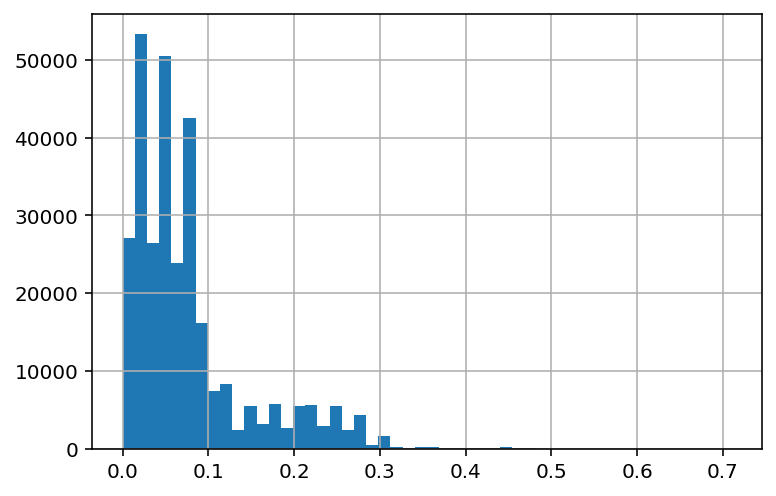

In [25]:
variant_df[variant_df.gene_bioType == 'protein_coding'].overallScore.hist(bins=50)

<AxesSubplot:>

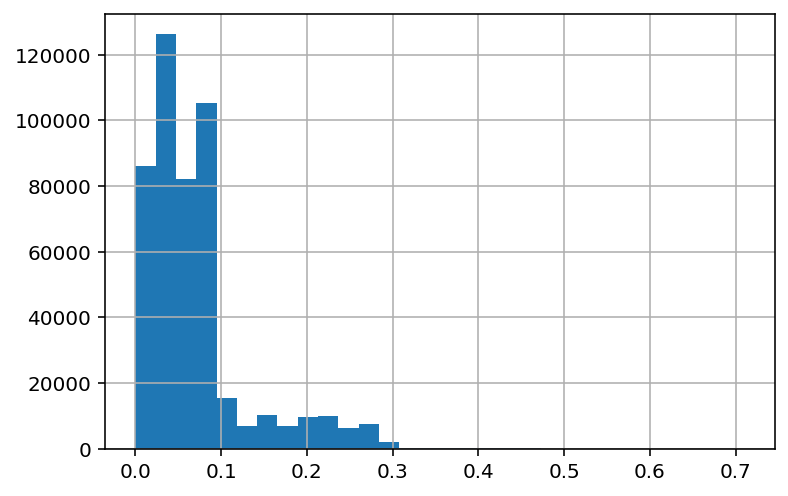

In [26]:
variant_df.overallScore.hist(bins=30)

In [27]:
variant_df.overallScore

0         0.054396
1         0.190659
2         0.271978
3         0.009066
4         0.063462
            ...   
475418    0.036264
475419    0.054396
475420    0.036264
475421    0.199451
475422    0.018132
Name: overallScore, Length: 475423, dtype: float64

In [28]:
from scipy.stats import beta

a, b, loc, scale = beta.fit(variant_df[variant_df.gene_bioType == 'protein_coding'].overallScore)
a,b,loc,scale

/home/gokcen/.miniconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


(0.7624486602841319,
 4.429130380023949,
 -1.5426354318314705e-28,
 0.7122183601099102)

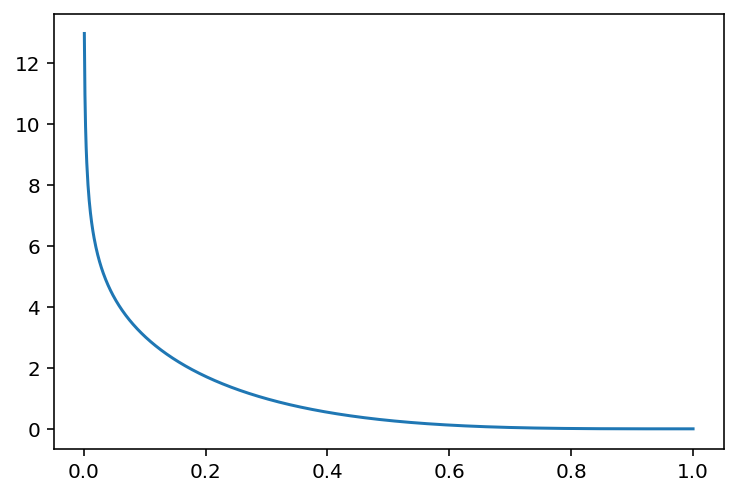

In [29]:
import matplotlib.pyplot as plt

x = np.linspace(1e-3, 1, 1000)
plt.plot(x, beta.pdf(x, a, b))

In [57]:
beta.ppf(0.75, a, b)

0.2162845344509397

In [58]:
beta.cdf(0.2, a, b)

0.7232153615080914

In [30]:
variant_df

,variant,overallScore,qtls,intervals,functionalPredictions,distances,gene_id,gene_symbol,gene_description,gene_chromosome,gene_start,gene_end,gene_tss,gene_bioType,gene_fwdStrand,gene_exons
0,21_33060745_G_C,0.054396,[],[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000243646,IL10RB,interleukin 10 receptor subunit beta [Source:H...,21,33266367,33310187,33266367,protein_coding,True,"[33296184, 33297221, 33288104, 33288261, 33283..."
1,21_33060745_G_C,0.190659,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...",[],"[{'typeId': 'fpred', 'sourceId': 'vep', 'aggre...","[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000232539,LINC00945,long intergenic non-protein coding RNA 945 [So...,21,33057829,33064983,33057829,lincRNA,True,"[33058101, 33058204, 33057829, 33057898, 33064..."
2,21_33060745_G_C,0.271978,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...",[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000184221,OLIG1,oligodendrocyte transcription factor 1 [Source...,21,33070141,33072413,33070141,protein_coding,True,"[33070141, 33072413]"
3,21_33060745_G_C,0.009066,[],[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000186842,LINC00846,long intergenic non-protein coding RNA 846 [So...,21,32572238,32575881,32575881,3prime_overlapping_ncRNA,False,"[32574096, 32574124, 32574576, 32575881, 32572..."
4,21_33060745_G_C,0.063462,[],[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000159110,IFNAR2,interferon alpha and beta receptor subunit 2 [...,21,33229901,33265675,33229901,protein_coding,True,"[33262793, 33264525, 33260597, 33260727, 33252..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475418,4_153458807_T_C,0.036264,[],[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000145428,RNF175,ring finger protein 175 [Source:HGNC Symbol;Ac...,4,153710125,153760235,153760235,protein_coding,False,"[153723351, 153723458, 153728207, 153728361, 1..."
475419,4_153458807_T_C,0.054396,[],[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000137462,TLR2,toll like receptor 2 [Source:HGNC Symbol;Acc:H...,4,153684070,153705702,153684070,protein_coding,True,"[153701500, 153705699]"
475420,4_153458807_T_C,0.036264,[],[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000145423,SFRP2,secreted frizzled related protein 2 [Source:HG...,4,153780591,153789083,153789083,protein_coding,False,"[153780591, 153781755, 153785864, 153785944, 1..."
475421,4_153458807_T_C,0.199451,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...",[],[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000121210,TMEM131L,transmembrane 131 like [Source:HGNC Symbol;Acc...,4,153466346,153636711,153466346,protein_coding,True,"[153602542, 153602727, 153602152, 153602338, 1..."


In [31]:
variant_df.loc[variant_df.overallScore.idxmax()]

variant                                                    19_51031874_A_G
overallScore                                                       0.70989
qtls                     [{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...
intervals                                                               []
functionalPredictions    [{'typeId': 'fpred', 'sourceId': 'vep', 'aggre...
distances                [{'typeId': 'distance', 'sourceId': 'canonical...
gene_id                                                    ENSG00000186474
gene_symbol                                                          KLK12
gene_description         kallikrein related peptidase 12 [Source:HGNC S...
gene_chromosome                                                         19
gene_start                                                        51029092
gene_end                                                          51035230
gene_tss                                                          51035230
gene_bioType             

In [32]:
variant_df[variant_df.gene_bioType=='protein_coding'][['variant', 'overallScore', 'gene_symbol', 'gene_bioType']].head(20)

,variant,overallScore,gene_symbol,gene_bioType
0,21_33060745_G_C,0.054396,IL10RB,protein_coding
2,21_33060745_G_C,0.271978,OLIG1,protein_coding
4,21_33060745_G_C,0.063462,IFNAR2,protein_coding
6,21_33060745_G_C,0.235714,OLIG2,protein_coding
7,21_33060745_G_C,0.045330,PAXBP1,protein_coding
8,21_33060745_G_C,0.036264,IFNGR2,protein_coding
9,21_33060745_G_C,0.009066,SON,protein_coding
10,21_33060745_G_C,0.018132,CFAP298,protein_coding
11,21_33060745_G_C,0.009066,GART,protein_coding
12,21_33060745_G_C,0.054396,C21orf62,protein_coding


## Pick protein coding genes with top overallScore V2G score

In [33]:
otg_genes = variant_df[variant_df.gene_bioType == 'protein_coding'].copy().sort_values(['variant', 'overallScore'], ascending=[True, False]).reset_index(drop=True)
otg_genes.head()

,variant,overallScore,qtls,intervals,functionalPredictions,distances,gene_id,gene_symbol,gene_description,gene_chromosome,gene_start,gene_end,gene_tss,gene_bioType,gene_fwdStrand,gene_exons
0,10_100045685_C_T,0.235714,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...","[{'typeId': 'pchic', 'sourceId': 'jung2019', '...",[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000095485,CWF19L1,CWF19 like cell cycle control factor 1 [Source...,10,100232298,100267680,100267680,protein_coding,False,"[100232298, 100233371, 100235667, 100235764, 1..."
1,10_100045685_C_T,0.226923,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...",[],"[{'typeId': 'fpred', 'sourceId': 'vep', 'aggre...","[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000120054,CPN1,carboxypeptidase N subunit 1 [Source:HGNC Symb...,10,100042193,100081877,100081877,protein_coding,False,"[100063614, 100063725, 100065188, 100065370, 1..."
2,10_100045685_C_T,0.217582,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...","[{'typeId': 'pchic', 'sourceId': 'jung2019', '...",[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000107554,DNMBP,dynamin binding protein [Source:HGNC Symbol;Ac...,10,99875577,100009947,100009947,protein_coding,False,"[99955214, 99957205, 99969115, 99969237, 99971..."
3,10_100045685_C_T,0.181319,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...","[{'typeId': 'dhscor', 'sourceId': 'thurman2012...",[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000213341,CHUK,conserved helix-loop-helix ubiquitous kinase [...,10,100188300,100229596,100229596,protein_coding,False,"[100188300, 100189627, 100190869, 100190968, 1..."
4,10_100045685_C_T,0.163187,"[{'typeId': 'eqtl', 'sourceId': 'eqtl', 'aggre...","[{'typeId': 'pchic', 'sourceId': 'jung2019', '...",[],"[{'typeId': 'distance', 'sourceId': 'canonical...",ENSG00000196072,BLOC1S2,biogenesis of lysosomal organelles complex 1 s...,10,100273280,100286680,100286680,protein_coding,False,"[100273293, 100275493, 100280124, 100280228, 1..."


In [34]:
v2g = otg_genes.loc[otg_genes.groupby('variant')['overallScore'].idxmax()][['variant', 'gene_id', 'gene_symbol', 'overallScore']].reset_index(drop=True)
v2g

,variant,gene_id,gene_symbol,overallScore
0,10_100045685_C_T,ENSG00000095485,CWF19L1,0.235714
1,10_100060908_A_G,ENSG00000095485,CWF19L1,0.235714
2,10_100069757_C_T,ENSG00000120054,CPN1,0.271978
3,10_100152307_T_C,ENSG00000107566,ERLIN1,0.344505
4,10_100152437_C_T,ENSG00000095485,CWF19L1,0.253846
...,...,...,...,...
25173,X_69611091_G_T,ENSG00000158813,EDA,0.235714
25174,X_70984291_C_A,ENSG00000147164,SNX12,0.081593
25175,X_81080394_C_T,ENSG00000198157,HMGN5,0.072527
25176,X_9334620_C_T,ENSG00000177138,FAM9B,0.090659


In [35]:
v2g = otg_genes[otg_genes.overallScore>0.2][['variant', 'gene_id', 'gene_symbol', 'overallScore']].reset_index(drop=True)
v2g

,variant,gene_id,gene_symbol,overallScore
0,10_100045685_C_T,ENSG00000095485,CWF19L1,0.235714
1,10_100045685_C_T,ENSG00000120054,CPN1,0.226923
2,10_100045685_C_T,ENSG00000107554,DNMBP,0.217582
3,10_100060908_A_G,ENSG00000095485,CWF19L1,0.235714
4,10_100060908_A_G,ENSG00000107554,DNMBP,0.208516
...,...,...,...,...
26662,X_20136228_C_G,ENSG00000173674,EIF1AX,0.281319
26663,X_20136228_C_G,ENSG00000173681,BCLAF3,0.244780
26664,X_20136228_C_G,ENSG00000184368,MAP7D2,0.235714
26665,X_2938114_C_T,ENSG00000157399,ARSE,0.271978


In [36]:
otg_df = otg_df.merge(v2g, left_on='id', right_on='variant').drop(columns='variant').sort_values('id').reset_index(drop=True)
otg_df

,id,rsid,CHR_ID,CHR_POS,gene_id,gene_symbol,overallScore
0,10_100045685_C_T,rs11599750,10,100045685,ENSG00000107554,DNMBP,0.217582
1,10_100045685_C_T,rs11599750,10,100045685,ENSG00000120054,CPN1,0.226923
2,10_100045685_C_T,rs11599750,10,100045685,ENSG00000095485,CWF19L1,0.235714
3,10_100060908_A_G,rs12782078,10,100060908,ENSG00000107554,DNMBP,0.208516
4,10_100060908_A_G,rs12782078,10,100060908,ENSG00000095485,CWF19L1,0.235714
...,...,...,...,...,...,...,...
26662,X_20136228_C_G,rs73447108,X,20136228,ENSG00000173674,EIF1AX,0.281319
26663,X_20136228_C_G,rs73447108,X,20136228,ENSG00000173681,BCLAF3,0.244780
26664,X_20136228_C_G,rs73447108,X,20136228,ENSG00000184368,MAP7D2,0.235714
26665,X_2938114_C_T,rs35143646,X,2938114,ENSG00000157399,ARSE,0.271978


In [37]:
otg_df[otg_df.rsid.isin(covid_rsids)].sort_values('gene_symbol')

,id,rsid,CHR_ID,CHR_POS,gene_id,gene_symbol,overallScore
22703,6_32212369_A_G,rs3131294,6,32212369,ENSG00000204305,AGER,0.217582
15161,21_33252612_A_G,rs2236757,21,33252612,ENSG00000249624,AP000295.1,0.281319
15158,21_33242905_T_C,rs13050728,21,33242905,ENSG00000249624,AP000295.1,0.253846
22698,6_32212369_A_G,rs3131294,6,32212369,ENSG00000244731,C4A,0.217582
22701,6_32212369_A_G,rs3131294,6,32212369,ENSG00000224389,C4B,0.244780
22355,6_31153649_G_A,rs143334143,6,31153649,ENSG00000204536,CCHCR1,0.281319
22356,6_31153649_G_A,rs143334143,6,31153649,ENSG00000204539,CDSN,0.271978
18851,3_45830416_G_A,rs67959919,3,45830416,ENSG00000172215,CXCR6,0.217582
18852,3_45859597_C_T,rs73064425,3,45859597,ENSG00000172215,CXCR6,0.226648
22702,6_32212369_A_G,rs3131294,6,32212369,ENSG00000231852,CYP21A2,0.226648


In [38]:
ebi['rsid'] = [x.split('-')[0].strip() for x in ebi['STRONGEST SNP-RISK ALLELE']]

In [39]:
pd.options.display.max_columns = 100

## Merge the V2G info back to the GWAS data frame

In [40]:
ebi_otg = ebi.reset_index().merge(otg_df[['id', 'rsid', 'gene_id', 'gene_symbol']], how='left').set_index('STUDY ACCESSION').rename(columns={'id': 'otg_variant_id', 'gene_id': 'otg_v2g_gene_id', 'gene_symbol': 'otg_v2g_gene_symbol'})
ebi_otg

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,REGION,CHR_ID,CHR_POS,REPORTED GENE(S),MAPPED_GENE,UPSTREAM_GENE_ID,DOWNSTREAM_GENE_ID,SNP_GENE_IDS,UPSTREAM_GENE_DISTANCE,DOWNSTREAM_GENE_DISTANCE,STRONGEST SNP-RISK ALLELE,SNPS,MERGED,SNP_ID_CURRENT,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV,MAPPED_TRAIT,MAPPED_TRAIT_URI,GENOTYPING TECHNOLOGY,ASSOCIATION COUNT,rsid,otg_variant_id,otg_v2g_gene_id,otg_v2g_gene_symbol
STUDY ACCESSION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GCST000117,2008-06-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Blue vs. green eyes,"2,986 individuals","3,932 individuals",15q13.1,15,28285036,OCA2,"HERC2, HERC2",NaN,NaN,"ENSG00000276802, ENSG00000128731",NaN,NaN,rs1667394-A,rs1667394,0.0,1.66739e+06,intron_variant,0.0,0.98,2E-53,52.698970,NaN,6.74,[4.61-9.83],Illumina [317511],N,Eye color,http://www.ebi.ac.uk/efo/EFO_0003949,Genome-wide genotyping array,3,rs1667394,15_28285036_C_T,ENSG00000128731,HERC2
GCST000117,2008-06-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Blue vs. green eyes,"2,986 individuals","3,932 individuals",11q14.3,11,89277878,TYR,TYR,NaN,NaN,ENSG00000077498,NaN,NaN,rs1393350-A,rs1393350,0.0,1.39335e+06,intron_variant,0.0,0.23,3E-12,11.522879,NaN,1.52,[1.28-1.81],Illumina [317511],N,Eye color,http://www.ebi.ac.uk/efo/EFO_0003949,Genome-wide genotyping array,3,rs1393350,NaN,NaN,NaN
GCST000119,2008-06-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Freckles,"2,986 individuals","3,932 individuals",6p25.3,6,466033,"SEC5L1, IRF4",AL512308.1,NaN,NaN,ENSG00000286364,NaN,NaN,rs1540771-A,rs1540771,0.0,1.54077e+06,intron_variant,0.0,0.42,4E-18,17.397940,NaN,1.40,[1.26-1.57],Illumina [317511],N,Freckles,http://www.ebi.ac.uk/efo/EFO_0003963,Genome-wide genotyping array,3,rs1540771,NaN,NaN,NaN
GCST000119,2008-06-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Freckles,"2,986 individuals","3,932 individuals",16q24.3,16,89919709,MC1R,"AC092143.1, MC1R",NaN,NaN,"ENSG00000198211, ENSG00000258839",NaN,NaN,rs1805007-T,rs1805007,0.0,1.80501e+06,missense_variant,0.0,0.05,1E-96,96.000000,NaN,4.37,[3.56-5.37],Illumina [317511],N,Freckles,http://www.ebi.ac.uk/efo/EFO_0003963,Genome-wide genotyping array,3,rs1805007,16_89919709_C_T,ENSG00000204991,SPIRE2
GCST000119,2008-06-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Freckles,"2,986 individuals","3,932 individuals",16q24.3,16,89919709,MC1R,"AC092143.1, MC1R",NaN,NaN,"ENSG00000198211, ENSG00000258839",NaN,NaN,rs1805007-T,rs1805007,0.0,1.80501e+06,missense_variant,0.0,0.05,1E-96,96.000000,NaN,4.37,[3.56-5.37],Illumina [317511],N,Freckles,http://www.ebi.ac.uk/efo/EFO_0003963,Genome-wide genotyping array,3,rs1805007,16_89919709_C_T,ENSG00000141013,GAS8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
unpublished_2020_09_25_medrxiv,2020-09-25,unpublished,Pairo-Castineira E,2020-09-25,medrxiv,https://www.medrxiv.org/content/10.1101/2020.0...,Genetic mechanisms of critical illness in Covi...,COVID-19,"2,636 GenOMICC 134 ISARIC 4C 10,000 controls",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rs11085727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COVID-19,NaN,NaN,10,rs11085727,19_10355447_C_T,ENSG00000076662,ICAM3
unpublished_2020_09_25_medrxiv,2020-09-25,unpublished,Pairo-Castineira E,2020-09-25,medrxiv,https://www.medrxiv.org/content/10.1101/2020.0...,Genetic mechanism

In [41]:
ebi_otg.columns

Index(['DATE ADDED TO CATALOG', 'PUBMEDID', 'FIRST AUTHOR', 'DATE', 'JOURNAL',
       'LINK', 'STUDY', 'DISEASE/TRAIT', 'INITIAL SAMPLE SIZE',
       'REPLICATION SAMPLE SIZE', 'REGION', 'CHR_ID', 'CHR_POS',
       'REPORTED GENE(S)', 'MAPPED_GENE', 'UPSTREAM_GENE_ID',
       'DOWNSTREAM_GENE_ID', 'SNP_GENE_IDS', 'UPSTREAM_GENE_DISTANCE',
       'DOWNSTREAM_GENE_DISTANCE', 'STRONGEST SNP-RISK ALLELE', 'SNPS',
       'MERGED', 'SNP_ID_CURRENT', 'CONTEXT', 'INTERGENIC',
       'RISK ALLELE FREQUENCY', 'P-VALUE', 'PVALUE_MLOG', 'P-VALUE (TEXT)',
       'OR or BETA', '95% CI (TEXT)', 'PLATFORM [SNPS PASSING QC]', 'CNV',
       'MAPPED_TRAIT', 'MAPPED_TRAIT_URI', 'GENOTYPING TECHNOLOGY',
       'ASSOCIATION COUNT', 'rsid', 'otg_variant_id', 'otg_v2g_gene_id',
       'otg_v2g_gene_symbol'],
      dtype='object')

## Collapse all variants within each study

In [42]:
cols = ['STUDY ACCESSION', 'DATE ADDED TO CATALOG', 'PUBMEDID', 'FIRST AUTHOR', 'DATE', 'JOURNAL', 'LINK', 'STUDY', 'DISEASE/TRAIT', 'MAPPED_TRAIT', 'INITIAL SAMPLE SIZE', 'ASSOCIATION COUNT'] #, 'REPLICATION SAMPLE SIZE']
final = ebi_otg[~ebi_otg.otg_variant_id.isnull()].reset_index().groupby(cols)[['rsid', 'otg_variant_id', 'otg_v2g_gene_id', 'otg_v2g_gene_symbol']].agg(tuple).reset_index().set_index('STUDY ACCESSION')
final

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,MAPPED_TRAIT,INITIAL SAMPLE SIZE,ASSOCIATION COUNT,rsid,otg_variant_id,otg_v2g_gene_id,otg_v2g_gene_symbol
STUDY ACCESSION,,,,,,,,,,,,,,,
GCST000115,2009-02-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Red vs non-red hair color,Hair color,"2,986 individuals",1,"(rs1805007, rs1805007, rs1805007, rs1805007, r...","(16_89919709_C_T, 16_89919709_C_T, 16_89919709...","(ENSG00000204991, ENSG00000141013, ENSG0000025...","(SPIRE2, GAS8, MC1R, DBNDD1, AC092143.1)"
GCST000116,2009-02-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Skin sensitivity to sun,Skin sensitivity to sun,"2,986 individuals",2,"(rs1805007, rs1805007, rs1805007, rs1805007, r...","(16_89919709_C_T, 16_89919709_C_T, 16_89919709...","(ENSG00000204991, ENSG00000141013, ENSG0000025...","(SPIRE2, GAS8, MC1R, DBNDD1, AC092143.1)"
GCST000117,2008-06-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Blue vs. green eyes,Eye color,"2,986 individuals",3,"(rs1667394,)","(15_28285036_C_T,)","(ENSG00000128731,)","(HERC2,)"
GCST000119,2008-06-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Freckles,Freckles,"2,986 individuals",3,"(rs1805007, rs1805007, rs1805007, rs1805007, r...","(16_89919709_C_T, 16_89919709_C_T, 16_89919709...","(ENSG00000204991, ENSG00000141013, ENSG0000025...","(SPIRE2, GAS8, MC1R, DBNDD1, AC092143.1, TYR)"
GCST000120,2009-02-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Blue vs. brown eyes,Eye color,"2,986 individuals",1,"(rs1667394,)","(15_28285036_C_T,)","(ENSG00000128731,)","(HERC2,)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCST90010361,2020-10-30,31566214,Kulminski AM,2019-09-30,J Gerontol A Biol Sci Med Sci,www.ncbi.nlm.nih.gov/pubmed/31566214,Quantitative and qualitative role of antagonis...,High density lipoprotein cholesterol levels,High density lipoprotein cholesterol measurement,"29,902 European ancestry individuals",18,"(rs10468274, rs10468274, rs10468274, rs1046827...","(16_67888439_G_A, 16_67888439_G_A, 16_67888439...","(ENSG00000072736, ENSG00000141096, ENSG0000016...","(NFATC3, DPEP3, DUS2, LCAT, DPEP2, GFOD2, ACD,..."
GCST90010362,2020-10-30,31566214,Kulminski AM,2019-09-30,J Gerontol A Biol Sci Med Sci,www.ncbi.nlm.nih.gov/pubmed/31566214,Quantitative and qualitative role of antagonis...,Triglyceride levels,Triglyceride measurement,"29,902 European ancestry individuals",13,"(rs4350231, rs4350231, rs17145738, rs7607980, ...","(1_62456989_G_A, 1_62456989_G_A, 7_73568544_C_...","(ENSG00000162607, ENSG00000116641, ENSG0000000...","(USP1, DOCK7, MLXIPL, GRB14, COBLL1, NRBF2, RE..."
GCST90010363,2020-10-30,31566214,Kulminski AM,2019-09-30,J Gerontol A Biol Sci Med Sci,www.ncbi.nlm.nih.gov/pubmed/31566214,Quantitative and qualitative role of antagonis...,Total cholesterol levels,Total cholesterol measurement,"29,902 European ancestry individuals",24,"(rs9391858, rs9391858, rs9391858, rs9391858, r...","(6_32373621_A_G, 6_32373621_A_G, 6_32373621_A_...","(ENSG00000179344, ENSG00000198502, ENSG0000020...","(HLA-DQB1, HLA-DRB5, MICB, HLA-DQA1, HLA-DRB1,..."


## Remove duplicates in gene lists using the ids as reference

In [43]:
duplicates = [pd.Series(x).duplicated() for x in final.otg_v2g_gene_id]

In [44]:
final['otg_v2g_gene_id'] = [tuple(np.array(i)[~dup]) if not pd.isnull(i) else i for dup, i in zip(duplicates, final['otg_v2g_gene_id'])]
final['otg_v2g_gene_symbol'] = [tuple(np.array(i)[~dup]) if not pd.isnull(i) else i for dup, i in zip(duplicates, final['otg_v2g_gene_symbol'])]

In [45]:
final[final.index.duplicated(keep=False)]

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,MAPPED_TRAIT,INITIAL SAMPLE SIZE,ASSOCIATION COUNT,rsid,otg_variant_id,otg_v2g_gene_id,otg_v2g_gene_symbol
STUDY ACCESSION,,,,,,,,,,,,,,,
GCST009698,2020-02-25,31628463,Chai JF,2019-10-19,Hum Mol Genet,www.ncbi.nlm.nih.gov/pubmed/31628463,Associations with metabolites in Chinese sugge...,Metabolite levels,Acylcarnitine measurement,"1,954 Chinese ancestry individuals",134,"(rs4149056, rs200200955, rs174530, rs174530, r...","(12_21178615_T_C, 4_158700576_A_G, 11_61779120...","(ENSG00000134538, ENSG00000171503, ENSG0000012...","(SLCO1B1, ETFDH, MYRF, FADS2, TMEM258, FADS1, ..."
GCST009698,2020-02-25,31628463,Chai JF,2019-10-19,Hum Mol Genet,www.ncbi.nlm.nih.gov/pubmed/31628463,Associations with metabolites in Chinese sugge...,Metabolite levels,Ceramide measurement,"1,954 Chinese ancestry individuals",134,"(rs74181389, rs4814175, rs4814175, rs4814175, ...","(20_12977844_A_ACTC, 20_12978446_A_T, 20_12978...","(ENSG00000172296, ENSG00000157895, ENSG0000013...","(SPTLC3, C12orf43, OASL, HNF1A, CCNG1, SLCO1B3..."
GCST009698,2020-02-25,31628463,Chai JF,2019-10-19,Hum Mol Genet,www.ncbi.nlm.nih.gov/pubmed/31628463,Associations with metabolites in Chinese sugge...,Metabolite levels,Glycine measurement,"1,954 Chinese ancestry individuals",134,"(rs1047891,)","(2_210675783_C_A,)","(ENSG00000021826,)","(CPS1,)"
GCST009698,2020-02-25,31628463,Chai JF,2019-10-19,Hum Mol Genet,www.ncbi.nlm.nih.gov/pubmed/31628463,Associations with metabolites in Chinese sugge...,Metabolite levels,Proline measurement,"1,954 Chinese ancestry individuals",134,"(rs2277834, rs2277834)","(22_18923032_C_T, 22_18923032_C_T)","(ENSG00000183628, ENSG00000100033)","(DGCR6, PRODH)"
GCST009698,2020-02-25,31628463,Chai JF,2019-10-19,Hum Mol Genet,www.ncbi.nlm.nih.gov/pubmed/31628463,Associations with metabolites in Chinese sugge...,Metabolite levels,Serine measurement,"1,954 Chinese ancestry individuals",134,"(rs57427081,)","(7_56102348_C_CT,)","(ENSG00000106153,)","(CHCHD2,)"
GCST009698,2020-02-25,31628463,Chai JF,2019-10-19,Hum Mol Genet,www.ncbi.nlm.nih.gov/pubmed/31628463,Associations with metabolites in Chinese sugge...,Metabolite levels,Sphingolipid measurement,"1,954 Chinese ancestry individuals",134,"(rs438568, rs144527861, rs12887573, rs12887573...","(20_12978039_A_G, 6_31845195_G_A, 14_63868160_...","(ENSG00000172296, ENSG00000204388, ENSG0000005...","(SPTLC3, HSPA1B, SYNE2, ABCA7, POLR2E, SLCO5A1..."
GCST009698,2020-02-25,31628463,Chai JF,2019-10-19,Hum Mol Genet,www.ncbi.nlm.nih.gov/pubmed/31628463,Associations with metabolites in Chinese sugge...,Metabolite levels,Sphingomyelin measurement,"1,954 Chinese ancestry individuals",134,"(rs438568, rs438568, rs74181389, rs438568, rs4...","(20_12978039_A_G, 20_12978039_A_G, 20_12977844...","(ENSG00000172296,)","(SPTLC3,)"
GCST009885,2020-04-17,31960908,Nag A,2020-01-21,Hum Mol Genet,www.ncbi.nlm.nih.gov/pubmed/31960908,Genome-wide scan identifies novel genetic loci...,Salivary metabolite levels,"Salivary metabolite measurement, dimethylglyci...","1,419 European ancestry individuals",4,"(rs248386, rs248386, rs248386)","(5_79034404_C_A, 5_79034404_C_A, 5_79034404_C_A)","(ENSG00000145692, ENSG00000113273, ENSG0000013...","(BHMT, ARSB, BHMT2)"
GCST009885,2020-04-17,31960908,Nag A,2020-01-21,Hum Mol Genet,www.ncbi.nlm.nih.gov/pubmed/31960908,Genome-wide scan identifies novel genetic loci...,Salivary metabolite levels,"Salivary metabolite measurement, urate measure...","1,419 European ancestry individuals",4,"(rs13129697,)","(4_9925343_T_G,)","(ENSG00000109667,)","(SLC2A9,)"


## Save initial sample size as integer

In [46]:
final['INITIAL_SAMPLE_SIZE_INT'] = [sum([int(y.replace(',', '')) for y in x.split() if y.replace(',', '').isdigit()]) for x in final['INITIAL SAMPLE SIZE']]
final['ASSOCIATION COUNT MAPPED TRAIT'] = [len(x) for x in final.rsid]

In [47]:
final

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,MAPPED_TRAIT,INITIAL SAMPLE SIZE,ASSOCIATION COUNT,rsid,otg_variant_id,otg_v2g_gene_id,otg_v2g_gene_symbol,INITIAL_SAMPLE_SIZE_INT,ASSOCIATION COUNT MAPPED TRAIT
STUDY ACCESSION,,,,,,,,,,,,,,,,,
GCST000115,2009-02-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Red vs non-red hair color,Hair color,"2,986 individuals",1,"(rs1805007, rs1805007, rs1805007, rs1805007, r...","(16_89919709_C_T, 16_89919709_C_T, 16_89919709...","(ENSG00000204991, ENSG00000141013, ENSG0000025...","(SPIRE2, GAS8, MC1R, DBNDD1, AC092143.1)",2986,5
GCST000116,2009-02-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Skin sensitivity to sun,Skin sensitivity to sun,"2,986 individuals",2,"(rs1805007, rs1805007, rs1805007, rs1805007, r...","(16_89919709_C_T, 16_89919709_C_T, 16_89919709...","(ENSG00000204991, ENSG00000141013, ENSG0000025...","(SPIRE2, GAS8, MC1R, DBNDD1, AC092143.1)",2986,5
GCST000117,2008-06-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Blue vs. green eyes,Eye color,"2,986 individuals",3,"(rs1667394,)","(15_28285036_C_T,)","(ENSG00000128731,)","(HERC2,)",2986,1
GCST000119,2008-06-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Freckles,Freckles,"2,986 individuals",3,"(rs1805007, rs1805007, rs1805007, rs1805007, r...","(16_89919709_C_T, 16_89919709_C_T, 16_89919709...","(ENSG00000204991, ENSG00000141013, ENSG0000025...","(SPIRE2, GAS8, MC1R, DBNDD1, AC092143.1, TYR)",2986,6
GCST000120,2009-02-16,17952075,Sulem P,2007-10-21,Nat Genet,www.ncbi.nlm.nih.gov/pubmed/17952075,"Genetic determinants of hair, eye and skin pig...",Blue vs. brown eyes,Eye color,"2,986 individuals",1,"(rs1667394,)","(15_28285036_C_T,)","(ENSG00000128731,)","(HERC2,)",2986,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCST90010361,2020-10-30,31566214,Kulminski AM,2019-09-30,J Gerontol A Biol Sci Med Sci,www.ncbi.nlm.nih.gov/pubmed/31566214,Quantitative and qualitative role of antagonis...,High density lipoprotein cholesterol levels,High density lipoprotein cholesterol measurement,"29,902 European ancestry individuals",18,"(rs10468274, rs10468274, rs10468274, rs1046827...","(16_67888439_G_A, 16_67888439_G_A, 16_67888439...","(ENSG00000072736, ENSG00000141096, ENSG0000016...","(NFATC3, DPEP3, DUS2, LCAT, DPEP2, GFOD2, ACD,...",29902,21
GCST90010362,2020-10-30,31566214,Kulminski AM,2019-09-30,J Gerontol A Biol Sci Med Sci,www.ncbi.nlm.nih.gov/pubmed/31566214,Quantitative and qualitative role of antagonis...,Triglyceride levels,Triglyceride measurement,"29,902 European ancestry individuals",13,"(rs4350231, rs4350231, rs17145738, rs7607980, ...","(1_62456989_G_A, 1_62456989_G_A, 7_73568544_C_...","(ENSG00000162607, ENSG00000116641, ENSG0000000...","(USP1, DOCK7, MLXIPL, GRB14, COBLL1, NRBF2, RE...",29902,23
GCST90010363,2020-10-30,31566214,Kulminski AM,2019-09-30,J Gerontol A Biol Sci Med Sci,www.ncbi.nlm.nih.gov/pubmed/31566214,Quantitative and qualitative role of antagonis...,Total cholesterol levels,Total cholesterol measurement,"29,902 European ancestry individuals",24,"(rs9391858, rs9391858, rs9391858, rs9391858, r...","(6_32373621_A_G, 6_32373621_A_G, 6_32373621_A_...","(ENSG00000179344, ENSG00000198502, ENSG0000020...","(HLA-DQB1, HLA-DRB5, MICB, HLA-DQA1, HLA-DRB1,...",29902,31


In [48]:
assert np.all([len(x) if not pd.isnull(x) else 0 for x in final['otg_v2g_gene_symbol']] == [len(x) if not pd.isnull(x) else 0 for x in final['otg_v2g_gene_id']])

In [49]:
final.index.nunique()

574

In [50]:
final[final.MAPPED_TRAIT == 'COVID-19']

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,MAPPED_TRAIT,INITIAL SAMPLE SIZE,ASSOCIATION COUNT,rsid,otg_variant_id,otg_v2g_gene_id,otg_v2g_gene_symbol,INITIAL_SAMPLE_SIZE_INT,ASSOCIATION COUNT MAPPED TRAIT
STUDY ACCESSION,,,,,,,,,,,,,,,,,
GCST90000255,2020-06-26,32558485,Ellinghaus D,2020-06-17,N Engl J Med,www.ncbi.nlm.nih.gov/pubmed/32558485,Genomewide Association Study of Severe Covid-1...,Severe COVID-19 infection with respiratory fai...,COVID-19,"1,610 European ancestry cases, 2,205 European ...",23,"(rs657152,)","(9_133263862_C_A,)","(ENSG00000175164,)","(ABO,)",3815,1
unpublished_2020_09_25_medrxiv,2020-09-25,unpublished,Pairo-Castineira E,2020-09-25,medrxiv,https://www.medrxiv.org/content/10.1101/2020.0...,Genetic mechanisms of critical illness in Covi...,COVID-19,COVID-19,"2,636 GenOMICC 134 ISARIC 4C 10,000 controls",10,"(rs73064425, rs9380142, rs9380142, rs9380142, ...","(3_45859597_C_T, 6_29831017_A_G, 6_29831017_A_...","(ENSG00000172215, ENSG00000204632, ENSG0000020...","(CXCR6, HLA-G, HLA-F, HLA-A, ZFP57, MICA, HLA-...",12770,40


## Save the data frame

In [51]:
final.to_pickle('data/gwas_catalog_nov_11_2020_nonOTG_traits.pkl')